In [1]:
from models import Generator, Discriminator
import torch,torchvision
import torch.nn as nn
from torchvision.utils import make_grid
from utils import prep_dataset,show
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets
device='cuda' if torch.cuda.is_available() else 'cpu'


# MNIST dataset

In [8]:
bs = 100
# MNIST Dataset
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5),std=(0.5))])

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transform, download=False)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

In [9]:
G=Generator(1,64, 64,100).to(device)  
D=torchvision.models.resnet18()
D.conv1=nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
D.fc=nn.Linear(512,10)
D=D.to(device)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


models loaded and ready !!
Target class:-1
Accuracy on clean images: 89.48 
Accuracy on generated images: 10.54 
%images predicted as target: 0.0


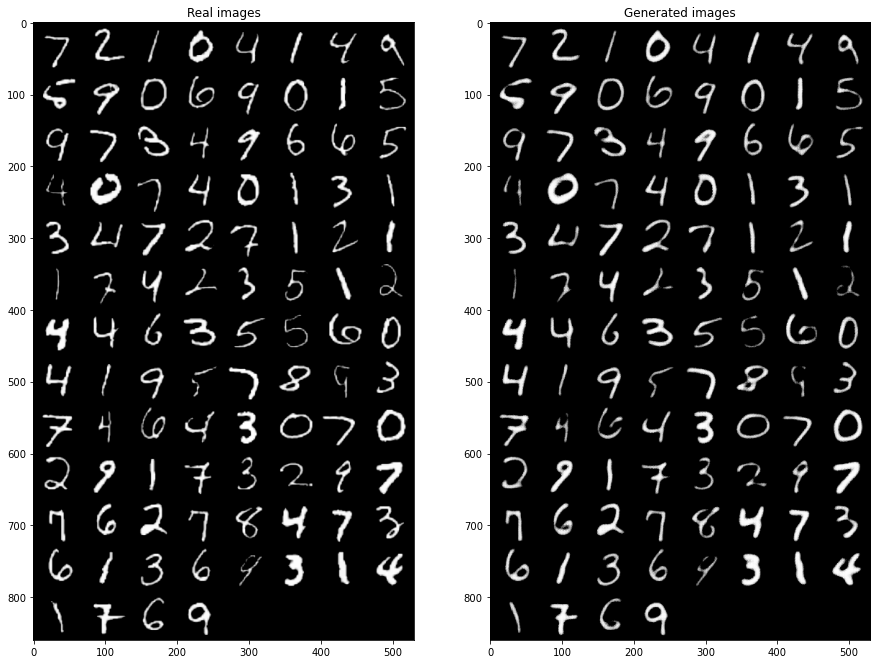

In [10]:
##set target=-1 for untargetted attack
target=-1
fold=0

#loading the models
G.load_state_dict(torch.load(f'./saved_models/mnist/G_{target}_fold{fold}.pt'))
D.load_state_dict(torch.load(f'./saved_models/mnist/D_{target}_fold{fold}.pt'))
G.eval(),D.eval()
print('models loaded and ready !!')

#loading images and plotting
images,labels =next(iter(test_loader))
images,labels=images.to(device),labels.to(device)
Gimages=G(images)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
grid=make_grid(images)
plt.imshow(grid.detach().cpu().numpy().transpose((1,2,0)))
plt.title('Real images')

plt.subplot(1,2,2)
grid=make_grid(Gimages)
plt.imshow(grid.detach().cpu().numpy().transpose((1,2,0)))
plt.title('Generated images')

tot_acc=gen_acc=tar=0
for images,labels in test_loader:
    images,labels=images.to(device),labels.to(device)
    tot_acc+=(torch.argmax(D(images),dim=1)==labels).sum()
    gen_acc+=(torch.argmax(D(Gimages),dim=1)==labels).sum()
    Gimages=G(images)
    tar+=(torch.argmax(D(Gimages),dim=1)==target).sum()
print(f'Target class:{target}')
print('Accuracy on clean images:',tot_acc.item()/len(test_loader),\
      '\nAccuracy on generated images:',gen_acc.item()/len(test_loader),'\n%images predicted as target:',tar.item()/len(test_loader))   
    


# CIFAR10

In [3]:
bs = 100
#CIFAR Dataset
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))])

train_dataset = datasets.CIFAR10(root='./cifar_data/', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./cifar_data/', train=False, transform=transform, download=False)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

Files already downloaded and verified


In [4]:
G=Generator(3,64, 64,100).to(device)  
D=torchvision.models.resnet18()
D.fc=nn.Linear(512,10)
D=D.to(device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


models loaded and ready!
Target class:-1
Accuracy on clean images: 80.11 
Accuracy on generated images: 9.83 
%images predicted as target: 0.0


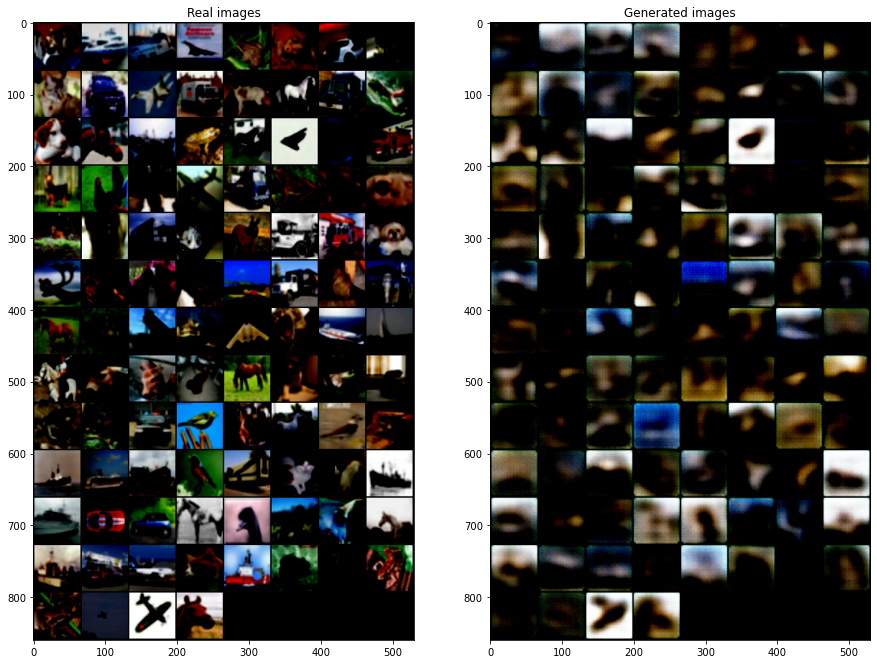

In [7]:
target=-1
fold=4
G.load_state_dict(torch.load(f'./saved_models/cifar/G_{target}_fold{fold}.pt'))
D.load_state_dict(torch.load(f'./saved_models/cifar/D_{target}_fold{fold}.pt'))
G.eval(),D.eval()
print('models loaded and ready!')

images,labels =next(iter(test_loader))
images,labels=images.to(device),labels.to(device)
Gimages=G(images)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
grid=make_grid(images)
plt.imshow(grid.detach().cpu().numpy().transpose((1,2,0)))
plt.title('Real images')

plt.subplot(1,2,2)
grid=make_grid(Gimages)
plt.imshow(grid.detach().cpu().numpy().transpose((1,2,0)))
plt.title('Generated images')

tot_acc=gen_acc=tar=0
for images,labels in test_loader:
    images,labels=images.to(device),labels.to(device)
    tot_acc+=(torch.argmax(D(images),dim=1)==labels).sum()
    gen_acc+=(torch.argmax(D(Gimages),dim=1)==labels).sum()
    Gimages=G(images)
    tar+=(torch.argmax(D(Gimages),dim=1)==target).sum()
print(f'Target class:{target}')
print('Accuracy on clean images:',tot_acc.item()/len(test_loader),\
      '\nAccuracy on generated images:',gen_acc.item()/len(test_loader),'\n%images predicted as target:',tar.item()/len(test_loader))   
    

